# Import Modules

In [1]:
import scanpy as sc
import squidpy as sq
import sys
sys.path.append(r"/home/yqzhou/JUPYTER/MyPackage/Pianno")
import pianno as po
import json
from os.path import join
import matplotlib.pyplot as plt
import matplotlib as mpl

# Data input

In [2]:
# Setting the data and configuration file storage path.
sample_name = "HIP"
config_path = "/home/yqzhou/JUPYTER/Revision/Tutorials/" + sample_name
adata = sc.read(join(config_path, "pianno_adata.h5ad"))

# (Optional) Step1：Automatic hyper-parameter selection

In [3]:
# Specify a known marker gene for each pattern
# Background's marker gene can be set to []
# Allow only one pattern's marker gene to be set to []
Patterndict = dict(CA1 = ['Wfs1'],
                   CA2 = ['Amigo2'],
                   CA3 = ["Pvrl3"],
                   DG = ['Prox1'],
                   Background = [])

Configuration path of Pianno: /home/yqzhou/JUPYTER/Revision/Tutorials/HIP
[2024-01-18 00:47:21] Creating experiment, Experiment ID: ieto0mrj
[2024-01-18 00:47:21] Starting web server...
[2024-01-18 00:47:22] Setting up...
[2024-01-18 00:47:22] Web UI URLs: http://127.0.0.1:8080 http://10.10.10.18:8080 http://11.11.11.18:8080
[2024-01-18 00:57:43] Stopping experiment, please wait...
[2024-01-18 00:57:46] Experiment stopped


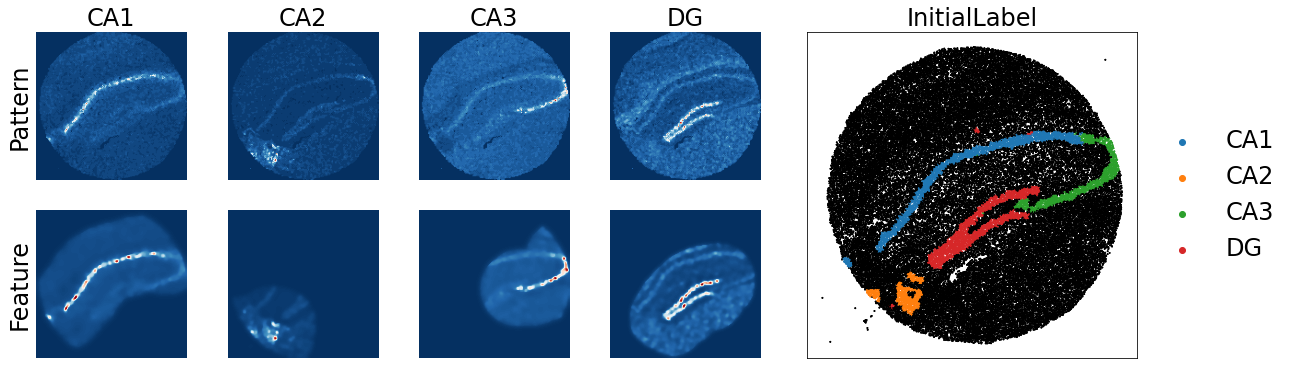

In [4]:
# If the connection fails, try a few more times.
# Open the Web UI URLs to visualize the hyperparameter tuning process.
# The default experiment lasts for a maximum of 10 minutes, 
# which can be modified according to the actual situation.
adata = po.AutoPatternRecognition(adata,
                                  Patterndict=Patterndict,
                                  config_path=config_path,
                                  param_tuning=True,
                                  max_experiment_duration='10m')

In [5]:
# Print the optimal parameters saved in the previous step.
with open(join(config_path, "best_params.json"),'r') as f:
    best_params_dict = json.load(f)
for key in best_params_dict:
    best_params = best_params_dict[key]  
best_params

{'n_class': 3,
 'dilation_radius': 40.0,
 'denoise_weight': 0.05,
 'unsharp_radius': 2.0,
 'unsharp_amount': 4.0,
 'gaussian_blur': 4.0}

# (Optional) Step2：Marker Selection

In [6]:
# Take the top 10 DEGs as candidate marker genes to make a proposed patterndict
Patterndict = po.ProposedPatterndict(adata, top_n=10)

CA1
['Wfs1', 'Igfbp4', 'Pou3f1', 'Fibcd1', 'Map4', 'Tmsb4x', 'Prkcb', 'Pantr1', 'Mpped1', 'Spink8']


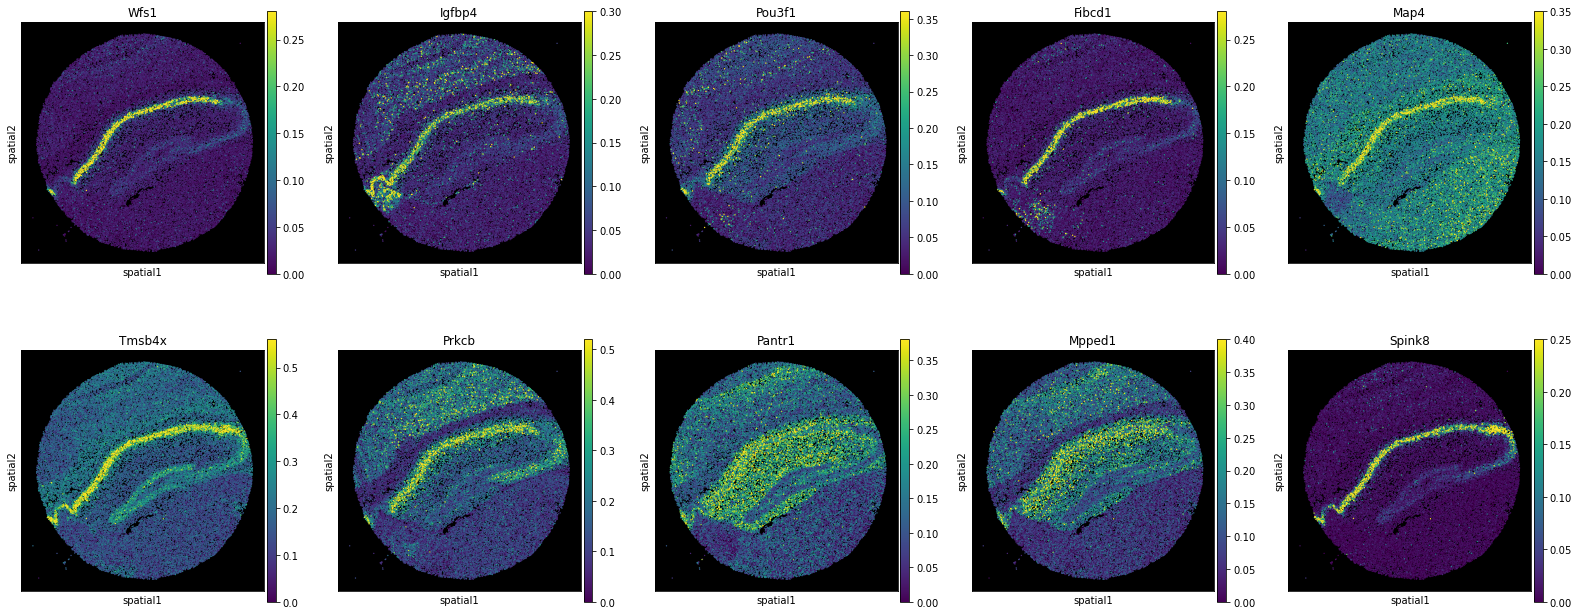

CA2
['Gng8', 'Syt9', 'Necab2', 'Gm5741', 'Irx2', 'Pou4f1', 'Cbln2', 'Vat1l', 'Zic4', 'Zic1']


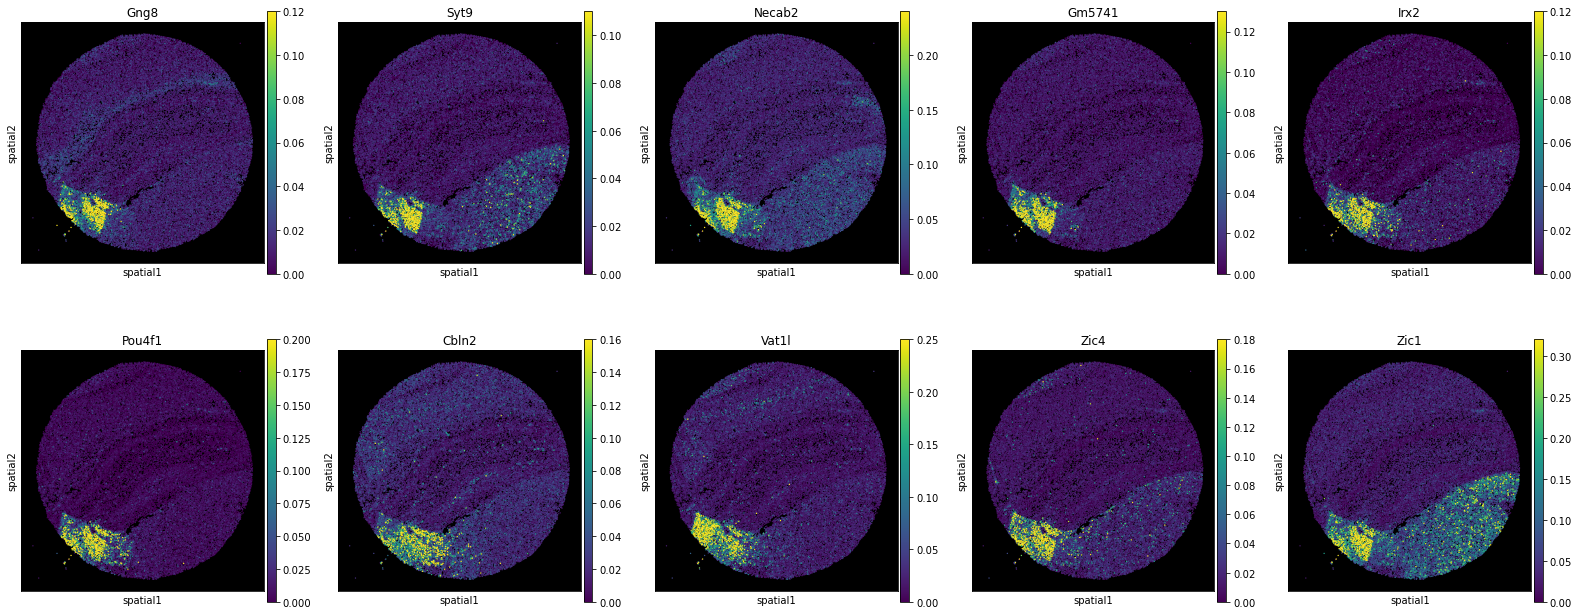

CA3
['Bok', 'Rab15', 'Syn2', 'Pvrl3', 'Hs3st4', 'Snap25', 'Chgb', 'Stmn2', 'Nrip3', 'Spock1']


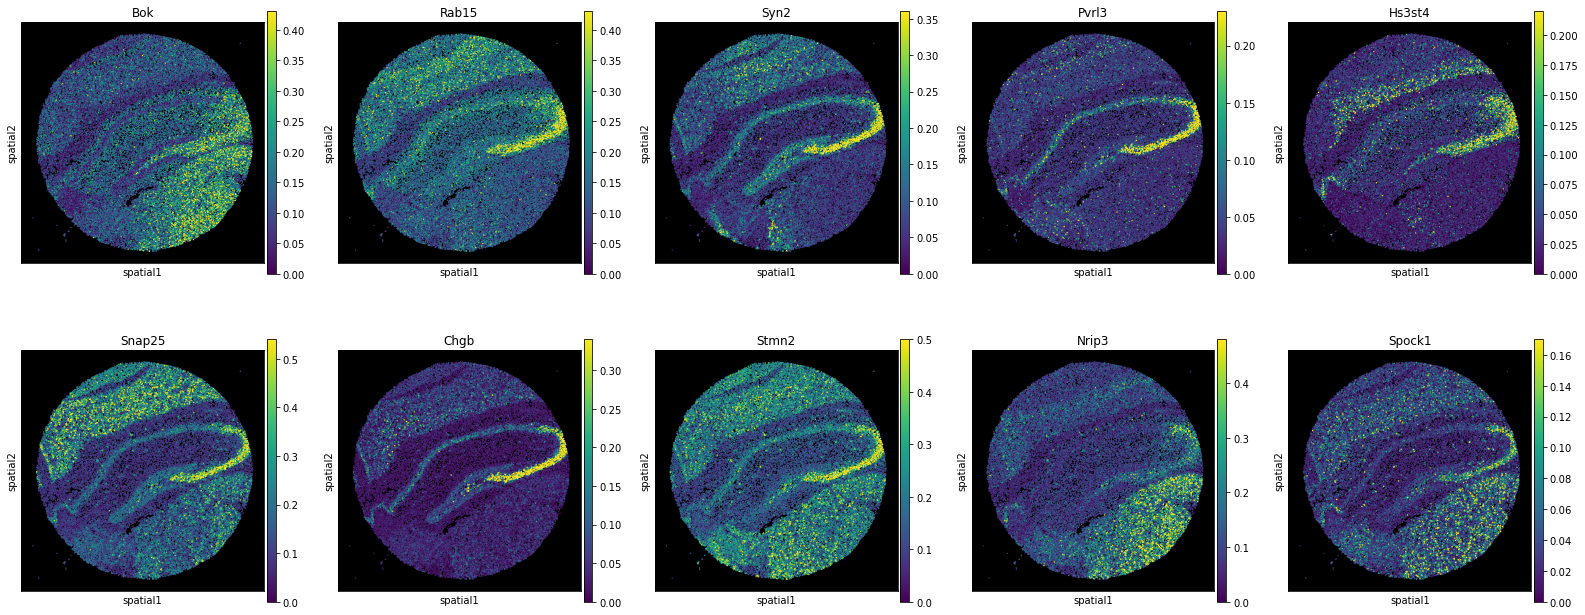

DG
['Trpc6', 'Foxo1', 'Plk5', 'Rfx3', 'Prox1', 'Plekha2', 'Fam163b', 'C1ql2', 'Stxbp6', 'Tiam1']


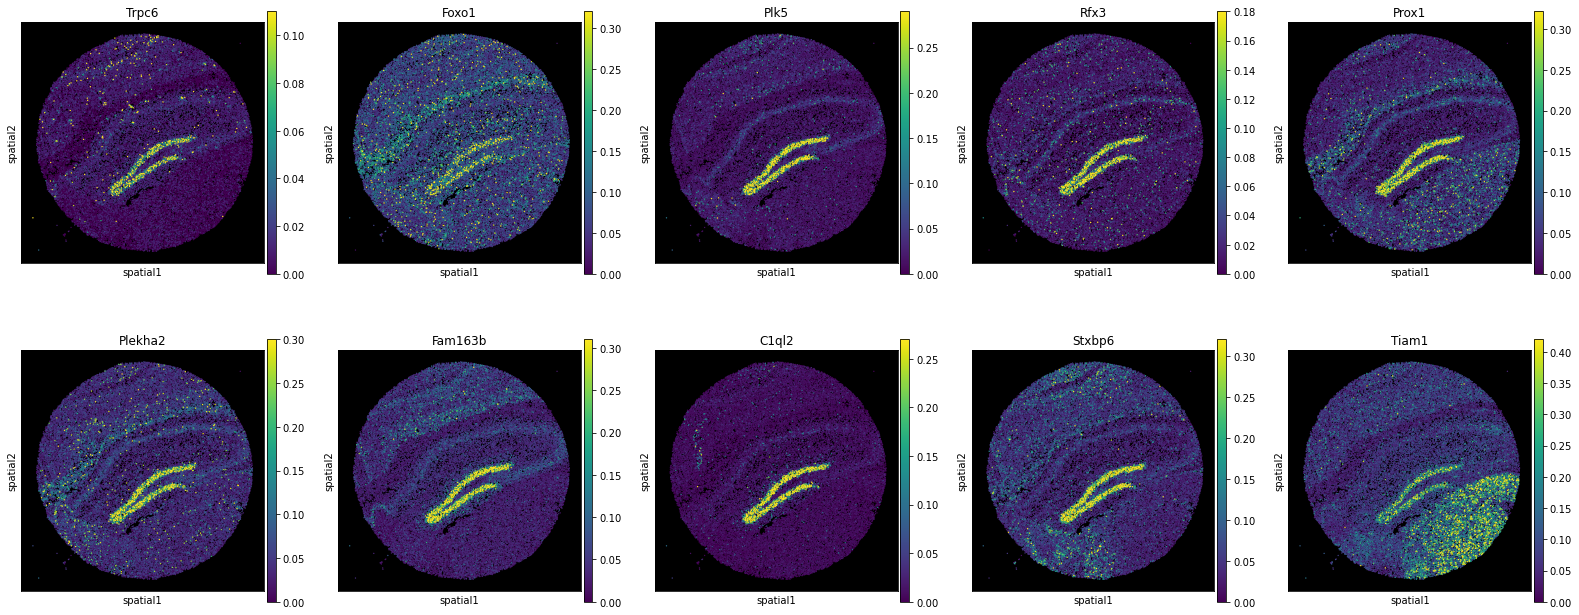

In [7]:
# Visualization of candidate marker genes
for k, v in Patterndict.items():
    print(k)
    print(v)
    with mpl.rc_context({'axes.facecolor':  'black',
                         'figure.figsize': [4.5, 5]}):
        sc.pl.spatial(adata, #cmap='magma',
                      layer='DenoisedX',
                      color=v,
                      ncols=5, size=1,
                      spot_size=30,
                      vmin=0, vmax='p99'
                     )

# Step3：Initial Pattern Recognition

In [8]:
# Construct the marker list by selecting 1-3 genes for each pattern 
# from the above candidate marker genes.
Patterndict = dict(CA1 = ['Wfs1', 'Fibcd1'],
                   CA2 = ['Rgs14'],
                   CA3 = ["Pvrl3", 'Chgb'],
                   DG = ['Prox1', 'Plk5', 'C1ql2'],
                   Background = [])

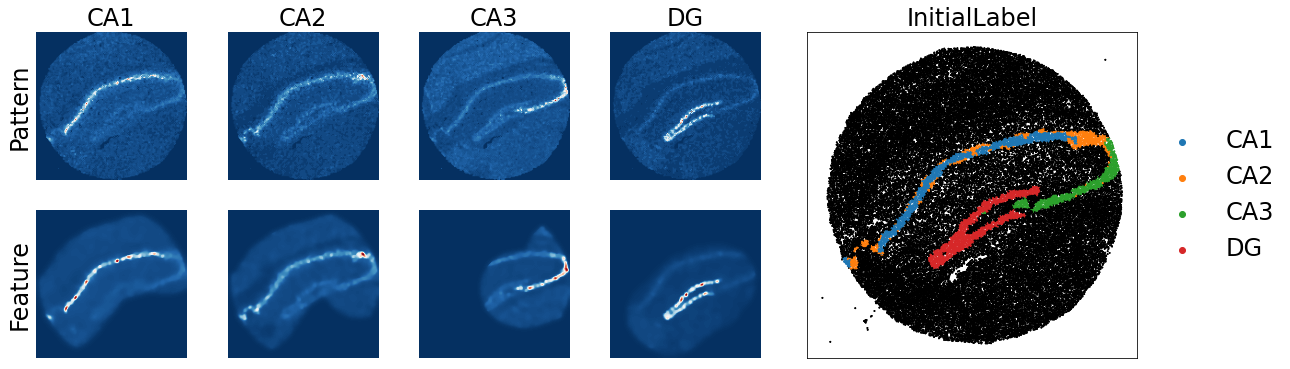

In [9]:
adata = po.AutoPatternRecognition(adata,
                                  Patterndict=Patterndict,
                                  config_path=config_path,
                                  param_tuning=False)

# Step4：Annotation Improvement

---Create Spatial Graph: Done!
---Compute Spatial Energy: Done!
---Find K-Nearest Neighbor in UMAP: Done!
---Compute KNN Energy: Done!
---Compute Global Energy: Done!


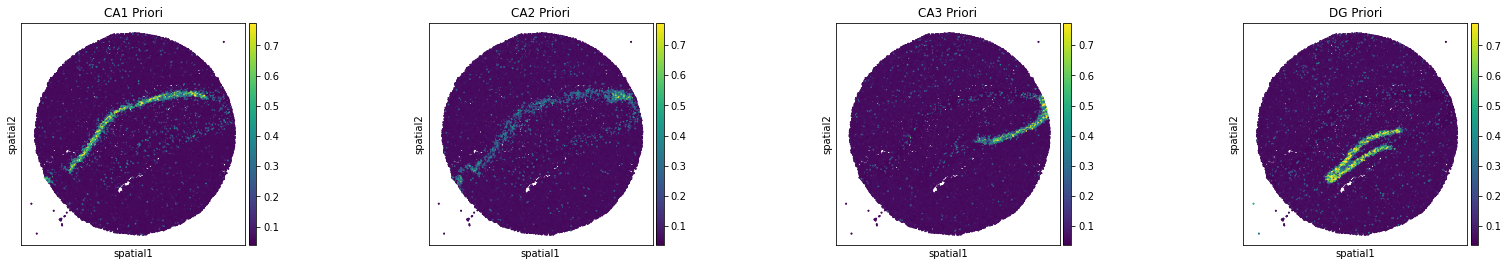

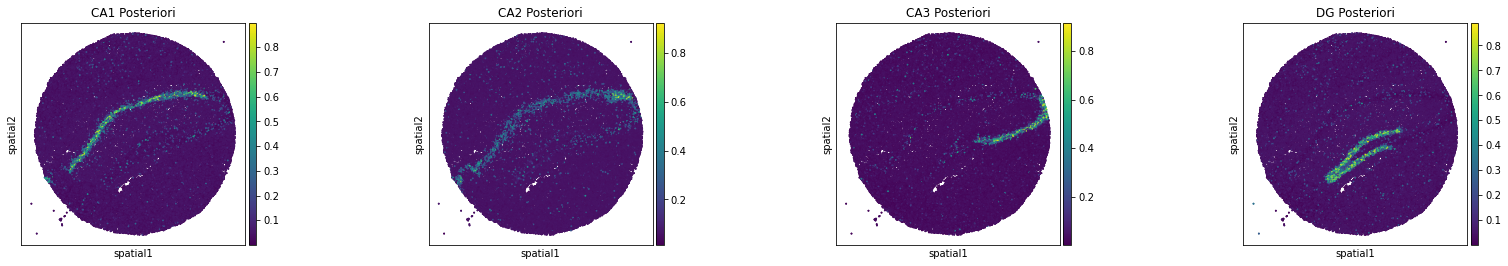

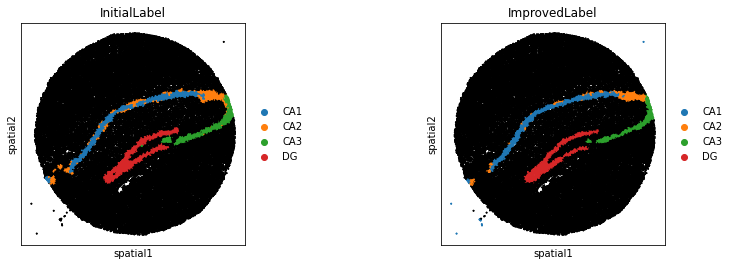

In [10]:
adata = po.AnnotationImprovement(adata)